# Model Evaluation
In der heutigen Übung sollen Sie auf zwei verschiedene Dataset die Crossvalidation sowie Grid Search anwenden. Welcher Algorithmus (Decision Tree/ KNN) liefert für die Datasets jeweils die besseren Ergebnisse?

## Dataset 1 laden

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# Load step_description.csv (columns separated by ';')
# First column contains text (features), second column contains target labels

df_steps = pd.read_csv('step_description.csv', sep=';', encoding='utf-8', engine='python')
raw_x = df_steps.iloc[:, 0].astype(str).values
raw_y = df_steps.iloc[:, 1].astype(str).values
# Convert text to numeric features with TF-IDF
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(raw_x)
# Encode string labels to integers
le = LabelEncoder()
y_enc = le.fit_transform(raw_y)
# Assign variables expected by later cells
x = X_text
y = y_enc
print('Loaded step_description.csv -> x shape:', x.shape, 'y shape:', y.shape)


Loaded step_description.csv -> x shape: (238, 509) y shape: (238,)


## Modell Training

c:\Users\Nico\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Tree Accuarcy: 1.0
Best Tree Params {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}


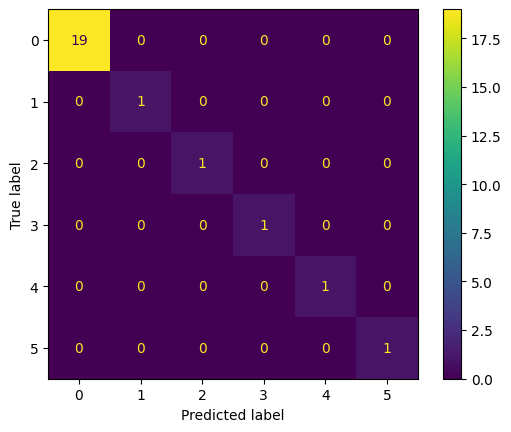

In [41]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x = x
y_labels = y
x_train, x_test, y_train, y_test = train_test_split(x, y_labels, test_size=0.1, random_state=42)

# Sample Params for DecisionTreeClassifier
parameters = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [16, 17, 18, 19, 20, 21, 22], 
    "min_samples_split": [2, 4, 6, 8, 10], 
    "min_samples_leaf": [1, 2, 3, 4], 
    "max_features": ["sqrt", "log2"]
}
clf_tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=3)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
clf_best = grid_cv.best_estimator_
print("Tree Accuarcy:", scores)
print("Best Tree Params", grid_cv.best_params_)
cm_tree = confusion_matrix(y_test, clf_tree.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm_tree).plot()

In [45]:
# Transform the input text using the existing TF-IDF vectorizer before predicting
text_input = ["ca. 15 Minuten bei 200 Grad im Ofen backen."]
tree_pred = clf_best.predict(vectorizer.transform(text_input))
# Convert encoded class back to original labels
print(le.inverse_transform(tree_pred))

['20.0']


## Speichern

In [ ]:
import pickle

with open('save_model.pkl', 'wb') as f:
    pickle.dump(clf_tree, f)

file = open('save_model.pkl', 'rb')
pickle.load(file)
